# 12. Data exploration - model (graphs)

In [1]:
sample_features_file <- "../preprocessed_data/sample_features_2019-09-02.feather"
sample_crude_file <- "../preprocessed_data/sample_features_crude_2019-09-02.feather"
sample_none_new_file <- "../preprocessed_data/sample_none_new_2019-09-02.feather"

In [10]:
library(tidyverse)

In [11]:
# options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

In [4]:
today <- Sys.Date()

## Read data

In [5]:
sample <- feather::read_feather(sample_features_file)
sample_crude <- feather::read_feather(sample_crude_file)
sample_none_new <- feather::read_feather(sample_none_new_file)
glimpse(sample)

Observations: 1,360
Variables: 61
$ YEAR                  <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,…
$ COMMODITY             <fct> crude, hvl, non-hvl, crude, hvl, non-hvl, crude…
$ OPERATOR_ID           <fct> Sunoco (Group), Sunoco (Group), Sunoco (Group),…
$ NAME                  <chr> "Sunoco (Group)", "Sunoco (Group)", "Sunoco (Gr…
$ MILES                 <dbl> 15019.350, 3935.970, 5206.330, 92.377, 24.609, …
$ AGE_UNKNOWN_MILES     <dbl> 1528.050, 259.860, 595.560, 0.000, 0.000, 0.000…
$ MILES_PRE_1940        <dbl> 1076.28, 18.92, 55.69, 0.00, 0.00, 0.00, 1.70, …
$ MILES_1940            <dbl> 2001.400, 365.420, 516.500, 0.000, 0.000, 0.000…
$ MILES_1950            <dbl> 2076.120, 328.320, 329.070, 84.333, 0.000, 11.2…
$ MILES_1960            <dbl> 726.150, 161.320, 414.740, 40.250, 52.120, 2.84…
$ MILES_1970            <dbl> 397.200, 146.090, 880.360, 0.000, 0.000, 25.322…
$ MILES_1980            <dbl> 189.900, 21.450, 200.980, 18.896, 4.482, 10.925…
$ MILES_1990      

## 12.1 Check consistency pre-2010 and post-2010

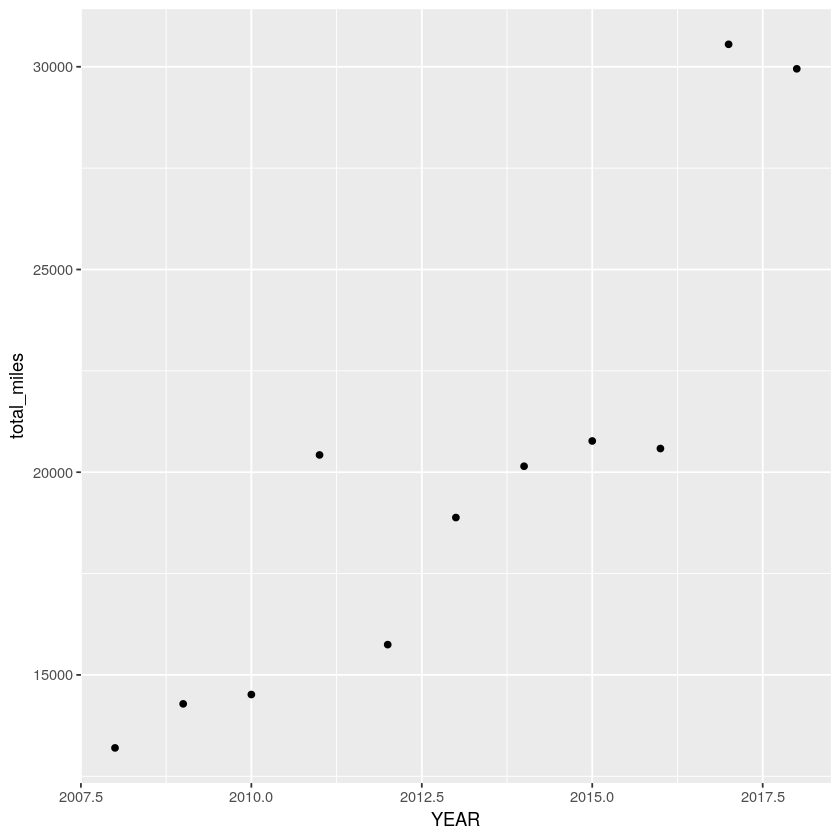

In [14]:
sample %>%
    filter(!is.na(MILES)) %>%
    filter(COMMODITY == "crude") %>%
    group_by(YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y = total_miles)) +
        geom_point()
        

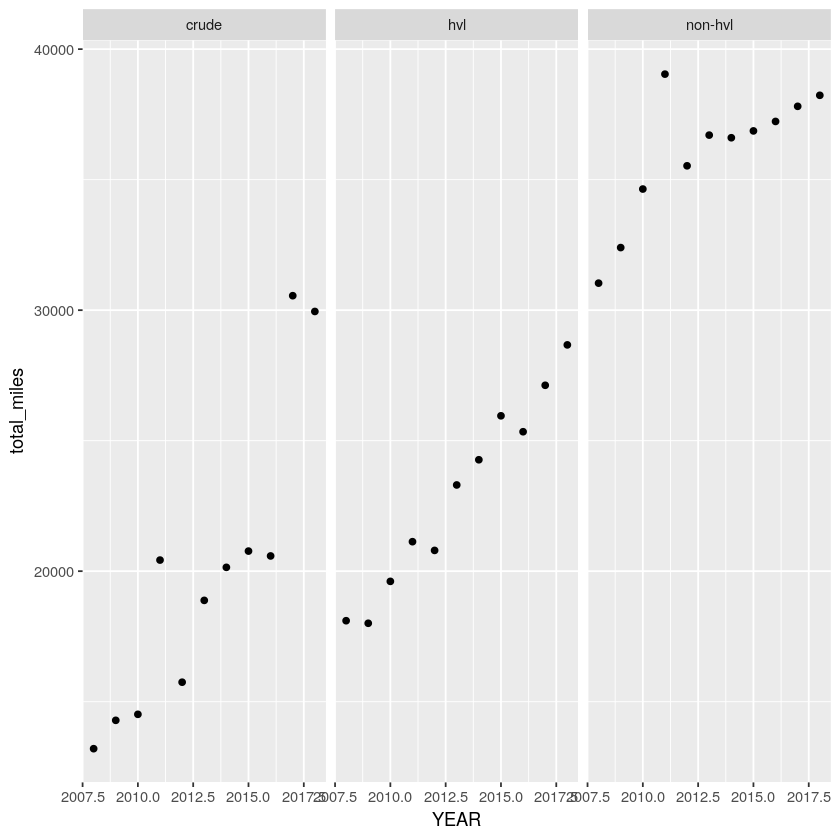

In [15]:
sample_none_new %>%
    filter(!is.na(MILES)) %>%
    group_by(COMMODITY, YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y = total_miles)) +
        geom_point() +
        facet_wrap(.~COMMODITY)

## 12.1 Create FE-like variables

Warning message:
“Removed 810 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 810 rows containing missing values (geom_point).”

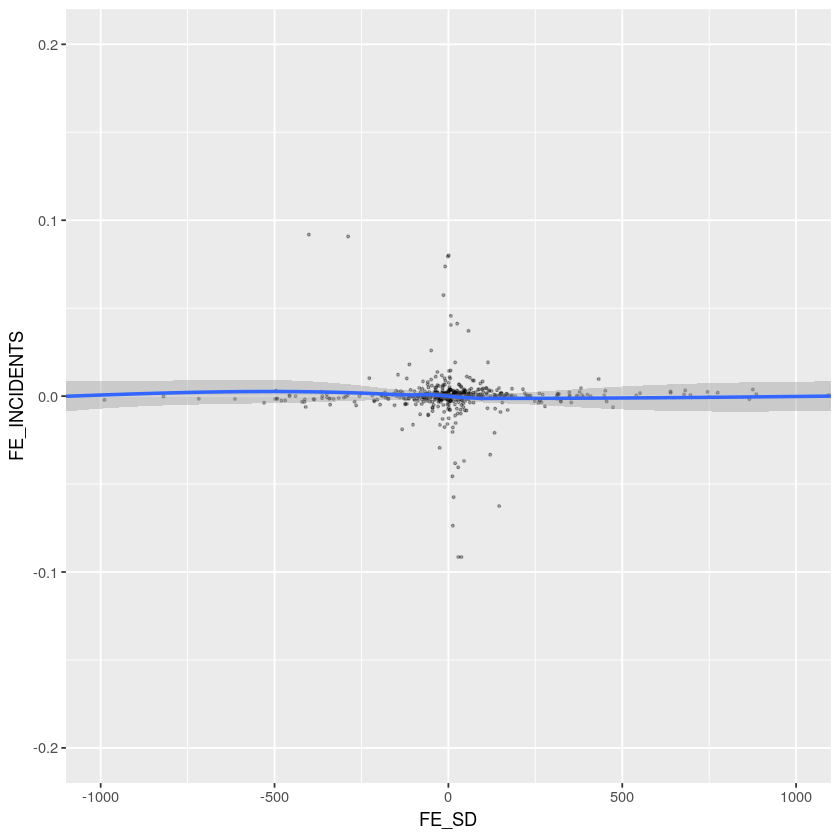

In [8]:
sample %>%
    group_by(YEAR, COMMODITY) %>%
    arrange(desc(YEAR)) %>%
    mutate(FE_INCIDENTS = (sign_inc_3/MILES) - (lead(sign_inc_3)/lead(MILES)), 
           FE_SD = sd_change_3 - lead(sd_change_3)) %>%
    ggplot(aes(x=FE_SD, y=FE_INCIDENTS)) +
        geom_jitter(size=0.5, alpha=0.3) +
        geom_smooth(method='loess') +
        coord_cartesian(ylim=c(-0.2, 0.2), xlim = c(-1000, 1000))

What are the extreme observations?

Warning message:
“Removed 306 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 306 rows containing missing values (geom_point).”

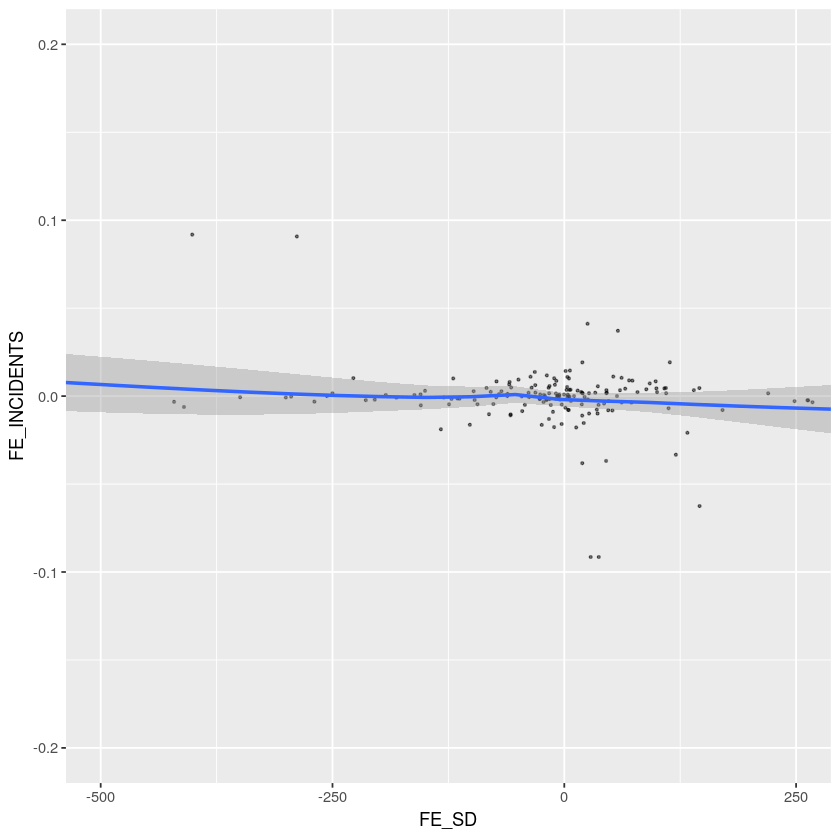

In [9]:
sample_crude %>%
    group_by(YEAR, COMMODITY) %>%
    arrange(desc(YEAR)) %>%
    mutate(FE_INCIDENTS = (sign_inc_3/MILES) - (lead(sign_inc_3)/lead(MILES)), 
           FE_SD = sd_change_3 - lead(sd_change_3)) %>%
    ggplot(aes(x=FE_SD, y=FE_INCIDENTS)) +
        geom_jitter(size=0.5, alpha=0.5) +
        geom_smooth(method='loess') +
        coord_cartesian(ylim=c(-0.2, 0.2), xlim = c(-500, 250))